### Recursive problem
Bellman equation in infinite time horizon is
$$V_{i}(W) = \max_{W'} u(W-W')+\beta V_{i+1}(W')$$

1. Guess $V_i(W)$
2. Plug $V_I$ into equation/operator to get new $V_{i+1}$
3. Check $||V_{i+1}-V_i||$
4. If $||V_{i+1}-V_i||\leq \epsilon$, done; If not, repeat 1 to 4

#### Excercise 5.9

In [1]:
import numpy as np
#Set a vetor of discretized cake sizes
W_lb = 1e-5
W_ub = 1.0
N = 1000
W_vec = np.linspace(W_lb, W_ub, N)

#### Excecise 5.10

In [2]:
#set other paramterers (discount factor)
beta = 0.9
#choose a utility function u(c)=log(c)
def utility(c):
    util = np.log(c)
    return util

The policy function $W' = \psi_T(W) = 0$

The value function $V_T(W) = ln(W)$

In [20]:
# Initial guess for value function
V_init = utility(W_vec)
print(V_init)

[-1.15129255e+01 -6.89682425e+00 -6.20863498e+00 -5.80482799e+00
 -5.51797601e+00 -5.29533084e+00 -5.11334168e+00 -4.95942849e+00
 -4.82607525e+00 -4.70843081e+00 -4.60318117e+00 -4.50796173e+00
 -4.42102597e+00 -4.34104725e+00 -4.26699412e+00 -4.19804879e+00
 -4.13355187e+00 -4.07296395e+00 -4.01583817e+00 -3.96180014e+00
 -3.91053312e+00 -3.86176674e+00 -3.81526833e+00 -3.77083630e+00
 -3.72829478e+00 -3.68748943e+00 -3.64828408e+00 -3.61055798e+00
 -3.57420354e+00 -3.53912452e+00 -3.50523445e+00 -3.47245536e+00
 -3.44071673e+00 -3.40995453e+00 -3.38011047e+00 -3.35113133e+00
 -3.32296838e+00 -3.29557690e+00 -3.26891576e+00 -3.24294701e+00
 -3.21763560e+00 -3.19294908e+00 -3.16885733e+00 -3.14533236e+00
 -3.12234812e+00 -3.09988031e+00 -3.07790623e+00 -3.05640464e+00
 -3.03535566e+00 -3.01474062e+00 -2.99454199e+00 -2.97474328e+00
 -2.95532896e+00 -2.93628439e+00 -2.91759575e+00 -2.89924997e+00
 -2.88123471e+00 -2.86353826e+00 -2.84614954e+00 -2.82905803e+00
 -2.81225373e+00 -2.79572

Text(0, 0.5, 'V')

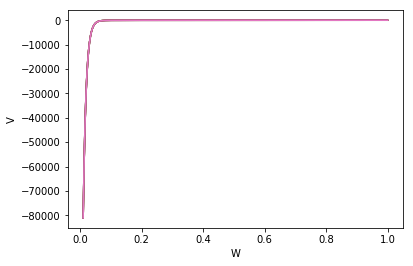

In [75]:
import matplotlib.pyplot as plt
plt.plot(W_vec, V_init)
plt.xlabel('W')
plt.ylabel('V')

#### Excercise 5.11

In [22]:
def dist(V_init, V_new):
    dist = ((V_new - V_init)**2).sum() #sum of squared errors
    return dist
delta = dist(V_init, np.zeros(N))
delta

2091.45911846743

#### Excercise 5.12

In [23]:
#Create utility matrix
c_mat = np.tile(W_vec.reshape((N,1)), (1,N)) - np.tile(W_vec.reshape((1,N)), (N,1))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-7 #lower traingle matrix
u_mat = utility(c_mat)
V_prime = np.tile(V_init.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
delta = dist(V_init, V_new)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_prime = W_vec[W_index]
W_prime

array([1.00000000e-05, 1.00000000e-05, 1.01099099e-03, 1.01099099e-03,
       2.01198198e-03, 2.01198198e-03, 3.01297297e-03, 3.01297297e-03,
       4.01396396e-03, 4.01396396e-03, 5.01495495e-03, 5.01495495e-03,
       6.01594595e-03, 6.01594595e-03, 7.01693694e-03, 7.01693694e-03,
       8.01792793e-03, 8.01792793e-03, 9.01891892e-03, 9.01891892e-03,
       9.01891892e-03, 1.00199099e-02, 1.00199099e-02, 1.10209009e-02,
       1.10209009e-02, 1.20218919e-02, 1.20218919e-02, 1.30228829e-02,
       1.30228829e-02, 1.40238739e-02, 1.40238739e-02, 1.50248649e-02,
       1.50248649e-02, 1.60258559e-02, 1.60258559e-02, 1.70268468e-02,
       1.70268468e-02, 1.80278378e-02, 1.80278378e-02, 1.80278378e-02,
       1.90288288e-02, 1.90288288e-02, 2.00298198e-02, 2.00298198e-02,
       2.10308108e-02, 2.10308108e-02, 2.20318018e-02, 2.20318018e-02,
       2.30327928e-02, 2.30327928e-02, 2.40337838e-02, 2.40337838e-02,
       2.50347748e-02, 2.50347748e-02, 2.60357658e-02, 2.60357658e-02,
      

In [24]:
delta = dist(V_init, V_new)
delta

6561751777.061499

#### Excercise 5.13

In [25]:
V_init = V_new
V_prime = np.tile(V_init.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
delta = dist(V_init, V_new)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_prime = W_vec[W_index]
delta = dist(V_init, V_new)
delta

5315020977.552818

#### Excercise 5.14

In [26]:
#set parameters
maxiters = 500
toler = 1e-9
delta = 10.0
VF_iter = 0

In [27]:
while delta>toler and VF_iter<maxiters:
    VF_iter += 1
    #One contraction mapping
    V_prime = np.tile(V_init.reshape((1,N)), (N,1))
    V_prime[~c_pos] = -9e+4
    V_new = (u_mat + beta*V_prime).max(axis = 1) #maximizing along the row
    delta = dist(V_init, V_new)
    W_index = np.argmax(u_mat + beta*V_prime, axis=1)
    W_prime = W_vec[W_index]
    print('Iter=', VF_iter, ', distance =', delta)
    V_init = V_new
print("Congrats!")
print('V(W)', V_init)

Iter= 1 , distance = 5315020977.552818
Iter= 2 , distance = 4305168309.845338
Iter= 3 , distance = 3487187250.3589296
Iter= 4 , distance = 2824622341.6940527
Iter= 5 , distance = 2287944596.557906
Iter= 6 , distance = 1853235503.7730677
Iter= 7 , distance = 1501121051.950571
Iter= 8 , distance = 1215908281.4562197
Iter= 9 , distance = 984885888.5483984
Iter= 10 , distance = 797757712.8943352
Iter= 11 , distance = 646183861.6265957
Iter= 12 , distance = 523409019.4570459
Iter= 13 , distance = 423961379.4868385
Iter= 14 , distance = 343408777.0028538
Iter= 15 , distance = 278161157.78336453
Iter= 16 , distance = 225310577.26121154
Iter= 17 , distance = 182501599.86160105
Iter= 18 , distance = 147826322.17959115
Iter= 19 , distance = 119739342.63837513
Iter= 20 , distance = 96988885.47414957
Iter= 21 , distance = 78561012.15025747
Iter= 22 , distance = 63634432.30522337
Iter= 23 , distance = 51543900.562441565
Iter= 24 , distance = 41750568.22983876
Iter= 25 , distance = 33817967.72239666

#### Excercise 5.15

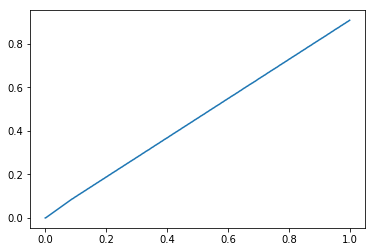

In [28]:
plt.plot(W_vec, W_prime)

### Stochastic process
$$V ( W , \varepsilon ) = \max _ { W ^ { \prime } \in [ 0 , W ] } \varepsilon u \left( W - W ^ { \prime } \right) + \beta E _ { \varepsilon ^ { \prime } } \left[ V \left( W ^ { \prime } , \varepsilon ^ { \prime } \right) \right] \quad \text { where } \quad \varepsilon \sim \mathrm { N } \left( \mu , \sigma ^ { 2 } \right)$$

#### Excercise 5.16

In [85]:
sigma = 0.5
M = 7
mu = 4*sigma
e_ub = mu+3*sigma
e_lb = mu-3*sigma
epsilon = np.linspace(e_lb, e_ub, M)
epsilon

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

**Major changes here!!**

In [90]:
import scipy.stats as sts
M=7
e_vec = np.linspace(e_lb, e_ub, M)
e_midpts = e_vec[:-1]+0.5*(e_vec[1:]-e_vec[:-1])
print(e_vec)
print(e_midpts)
gamma = np.zeros(M)
for e_ind in range(M):
    if e_ind==0:
        gamma[e_ind]=sts.norm.cdf(e_midpts[e_ind], loc=mu, scale=sigma)
    elif e_ind>0 and e_ind<M-1:
        gamma[e_ind] = (sts.norm.cdf(e_midpts[e_ind], mu, sigma))-(sts.norm.cdf(e_midpts[e_ind-1], mu, sigma))
    elif e_ind == M-1:
        gamma[e_ind]=1-sts.norm.cdf(e_midpts[e_ind-1], mu, sigma)
print(gamma)
gamma.sum()

[0.5 1.  1.5 2.  2.5 3.  3.5]
[0.75 1.25 1.75 2.25 2.75 3.25]
[0.00620967 0.06059754 0.24173034 0.38292492 0.24173034 0.06059754
 0.00620967]


1.0

#### Excercise 5.17

In [48]:
#Set a vetor of discretized cake sizes
W_lb = 1e-2
W_ub = 1.0
N = 1000
W_vec = np.linspace(W_lb, W_ub, N)

#epsilon * u(W-W')
c_mat = np.tile(W_vec.reshape((N,1)), (1,N)) - np.tile(W_vec.reshape((1,N)), (N,1))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-7 #lower traingle matrix
u_mat = utility(c_mat)
eu_cube = np.array([u_mat*e for e in epsilon])#(M,N,N) 3D array
print(c_mat)
print(u_mat)

[[1.00000000e-07 1.00000000e-07 1.00000000e-07 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 [9.90990991e-04 1.00000000e-07 1.00000000e-07 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 [1.98198198e-03 9.90990991e-04 1.00000000e-07 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 ...
 [9.88018018e-01 9.87027027e-01 9.86036036e-01 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 [9.89009009e-01 9.88018018e-01 9.87027027e-01 ... 9.90990991e-04
  1.00000000e-07 1.00000000e-07]
 [9.90000000e-01 9.89009009e-01 9.88018018e-01 ... 1.98198198e-03
  9.90990991e-04 1.00000000e-07]]
[[-1.61180957e+01 -1.61180957e+01 -1.61180957e+01 ... -1.61180957e+01
  -1.61180957e+01 -1.61180957e+01]
 [-6.91680511e+00 -1.61180957e+01 -1.61180957e+01 ... -1.61180957e+01
  -1.61180957e+01 -1.61180957e+01]
 [-6.22365793e+00 -6.91680511e+00 -1.61180957e+01 ... -1.61180957e+01
  -1.61180957e+01 -1.61180957e+01]
 ...
 [-1.20543445e-02 -1.30578569e-02 -1.40623773e-02 ... -1.61180957e+01
  -1.61180

In [57]:
#value function of entering T+1 with W'
V_init = np.zeros((N,M))
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
print(EV_prime_mat)
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])

[[-90000. -90000. -90000. ... -90000. -90000. -90000.]
 [     0. -90000. -90000. ... -90000. -90000. -90000.]
 [     0.      0. -90000. ... -90000. -90000. -90000.]
 ...
 [     0.      0.      0. ... -90000. -90000. -90000.]
 [     0.      0.      0. ...      0. -90000. -90000.]
 [     0.      0.      0. ...      0.      0. -90000.]]


In [58]:
V_new_cube = eu_cube + beta*EV_prime_cube
#print(V_new_cube)

In [59]:
V_new_sheet = np.zeros((N,M))
W_new_sheet = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new_sheet[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new_sheet[i] = W_vec[W_index]
print(W_new_sheet)

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]


#### Excercise 5.18

In [60]:
def dist(V_init, V_new):
    dist = np.sum((V_init-V_new)**2)
    return dist
print('delta = ', dist(V_init, V_new))

delta =  83189008605.93971


#### Excercise 5.19

In [66]:
V_init = V_new
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
V_new_cube = eu_cube + beta*EV_prime_cube
V_new_sheet = np.zeros((N,M))
W_new_sheet = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new_sheet[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new_sheet[i] = W_vec[W_index]
print(W_new_sheet)
V_init = V_new

[[0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01099099 0.01099099 0.01099099 ... 0.01099099 0.01099099 0.01099099]
 ...
 [0.70567568 0.54612613 0.44603604 ... 0.32810811 0.29045045 0.25972973]
 [0.70567568 0.54711712 0.44702703 ... 0.32810811 0.29045045 0.25972973]
 [0.70666667 0.54711712 0.44702703 ... 0.3290991  0.29045045 0.26072072]]


In [67]:
print(dist(V_init, V_new))

0.0


#### Excercise 5.20

In [69]:
V_init = V_new
#V_init[~c_pos] = -9e+4
EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
EV_prime_mat[~c_pos] = -9e+4
EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
V_new_cube = eu_cube + beta*EV_prime_cube
V_new_sheet = np.zeros((N,M))
W_new_sheet = np.zeros((N,M))
for i in range(N):
    sheet = V_new_cube[:, i, :]
    V_new_sheet[i] = sheet.max(axis=1)
    W_index = np.argmax(sheet, axis=1)
    W_new_sheet[i] = W_vec[W_index]
print('Delta = ', dist(V_init, V_new_sheet))
print('New policy function: \n', W_new_sheet)
print('New value function: \n', V_new)

Delta =  30141058016.784824
New policy function: 
 [[0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01099099 0.01099099 0.01099099 ... 0.01099099 0.01099099 0.01099099]
 ...
 [0.70567568 0.54612613 0.44603604 ... 0.32810811 0.29045045 0.25972973]
 [0.70567568 0.54711712 0.44702703 ... 0.32810811 0.29045045 0.25972973]
 [0.70666667 0.54711712 0.44702703 ... 0.3290991  0.29045045 0.26072072]]
New value function: 
 [[-8.10080590e+04 -8.10161181e+04 -8.10241771e+04 ... -8.10402952e+04
  -8.10483543e+04 -8.10564133e+04]
 [-7.29135266e+04 -7.29169850e+04 -7.29204434e+04 ... -7.29273602e+04
  -7.29308186e+04 -7.29342770e+04]
 [-7.77900489e+00 -1.12374075e+01 -1.46958100e+01 ... -2.16126151e+01
  -2.50710177e+01 -2.85294202e+01]
 ...
 [-7.86184801e-01 -1.10195525e+00 -1.31250621e+00 ... -1.60086545e+00
  -1.70947020e+00 -1.80354411e+00]
 [-7.85057405e-01 -1.10032643e+00 -1.31037704e+00 ... -1.5

#### Excercise 5.21

In [91]:
maxiters = 500
toler = 1e-9
delta = 10.0
VF_iter = 0
V_init = np.zeros((N,M))

while delta>toler and VF_iter<maxiters:
    VF_iter += 1
    EV_prime = V_init @ gamma.reshape((M,1)) #(W', 1)
    EV_prime_mat = np.tile(EV_prime.reshape((1,N)), (N,1))
    EV_prime_mat[~c_pos] = -9e+4
    EV_prime_cube = np.array([EV_prime_mat for e in range(M)])
    V_new_cube = eu_cube + beta*EV_prime_cube
    V_new = np.zeros((N,M))
    W_new = np.zeros((N,M))
    for i in range(N):
        sheet = V_new_cube[:, i, :]
        V_new[i] = sheet.max(axis=1)
        W_index = np.argmax(sheet, axis=1)
        W_new[i] = W_vec[W_index]
    delta = dist(V_init, V_new)
    print('Iter=', VF_iter, ', distance= ', delta)
    V_init = V_new

W_new

Iter= 1 , distance=  45963634217.655945
Iter= 2 , distance=  37230639528.9837
Iter= 3 , distance=  30156875289.26997
Iter= 4 , distance=  24427105662.490448
Iter= 5 , distance=  19785981115.78903
Iter= 6 , distance=  16026663262.520042
Iter= 7 , distance=  12981611111.573057
Iter= 8 , distance=  10515115563.44228
Iter= 9 , distance=  8517251766.146847
Iter= 10 , distance=  6898980302.553578
Iter= 11 , distance=  5588179064.055283
Iter= 12 , distance=  4526429023.461065
Iter= 13 , distance=  3666410686.723878
Iter= 14 , distance=  2969795205.6301255
Iter= 15 , distance=  2405536171.456468
Iter= 16 , distance=  1948485962.3127387
Iter= 17 , distance=  1578274981.4584243
Iter= 18 , distance=  1278403838.2001579
Iter= 19 , distance=  1035508012.6559311
Iter= 20 , distance=  838762233.4884741
Iter= 21 , distance=  679398022.8936459
Iter= 22 , distance=  550312907.6102787
Iter= 23 , distance=  445753879.35855216
Iter= 24 , distance=  361060997.5125811
Iter= 25 , distance=  292459707.0806443


array([[0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.01099099, 0.01099099, 0.01099099, ..., 0.01099099, 0.01099099,
        0.01099099],
       ...,
       [0.97324324, 0.94945946, 0.92765766, ..., 0.88603604, 0.86720721,
        0.84837838],
       [0.97423423, 0.95045045, 0.92864865, ..., 0.88702703, 0.86720721,
        0.84936937],
       [0.97522523, 0.95144144, 0.92963964, ..., 0.88801802, 0.8681982 ,
        0.85036036]])

#### Excercise 5.22

<IPython.core.display.Javascript object>


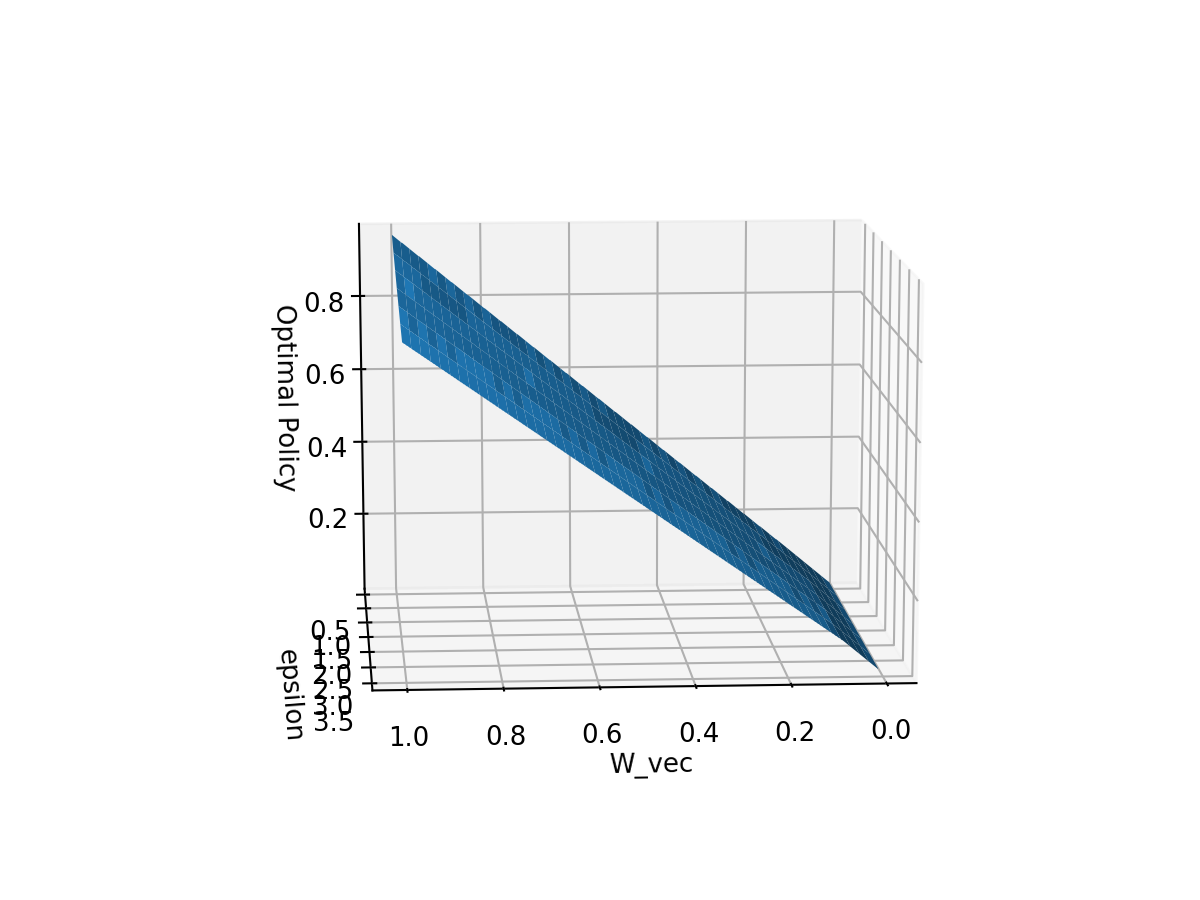

In [92]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
from mpl_toolkits import mplot3d
X, Y = np.meshgrid(W_vec, epsilon)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.T, Y.T, W_new)
ax.set_xlabel('W_vec')
ax.set_ylabel('epsilon')
ax.set_zlabel('Optimal Policy')
ax.view_init(elev=60,azim=30)
plt.show()